<a href="https://colab.research.google.com/github/Tirna2/IML/blob/main/Project_iml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv('/content/data_w_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [ ]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


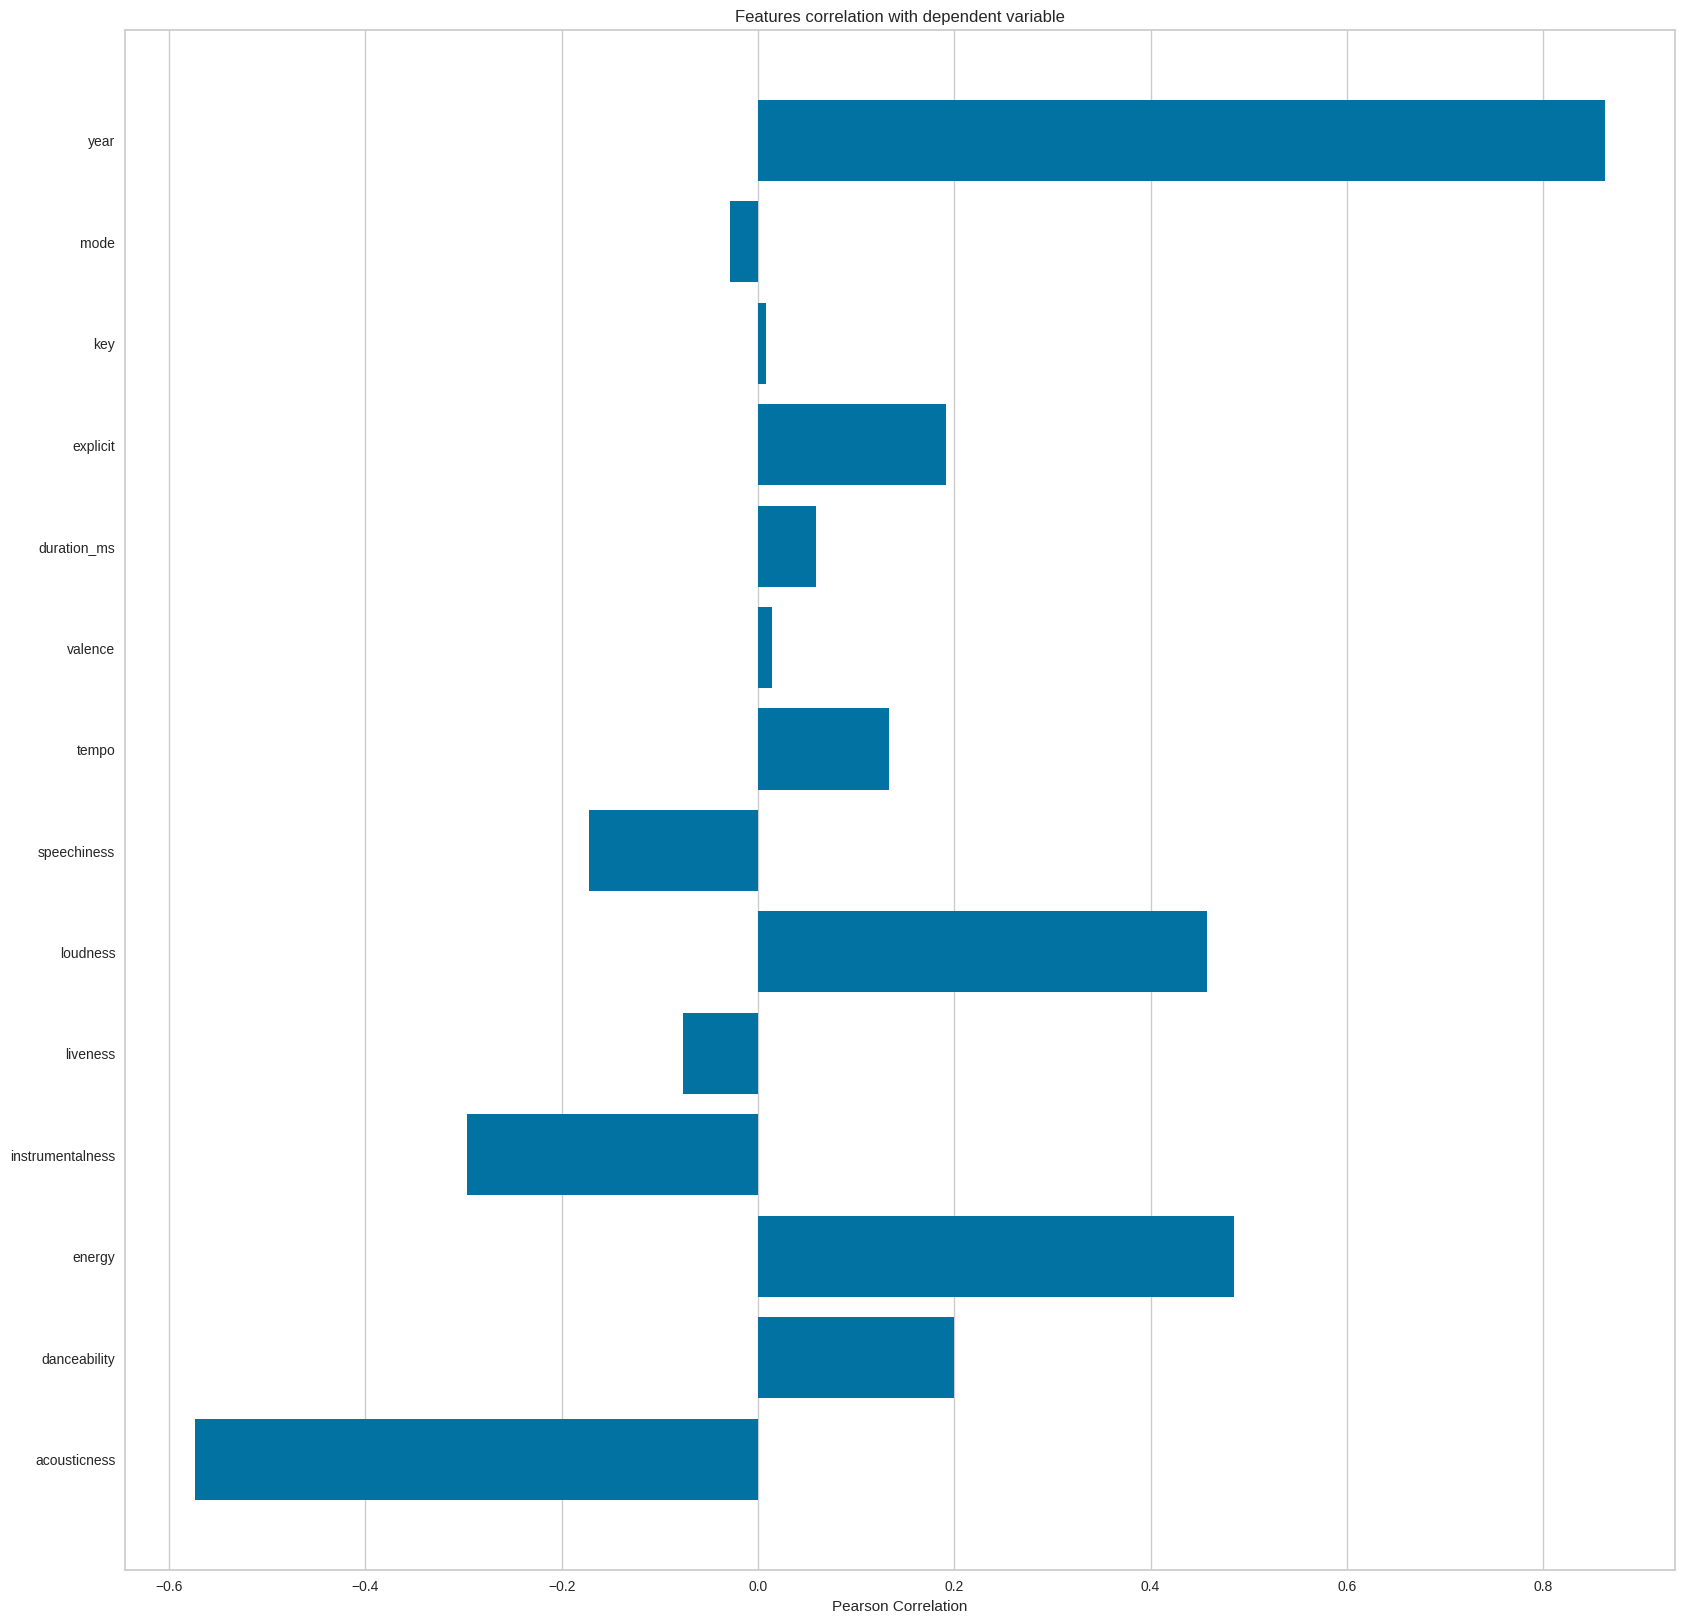

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<Axes: xlabel='count', ylabel='decade'>

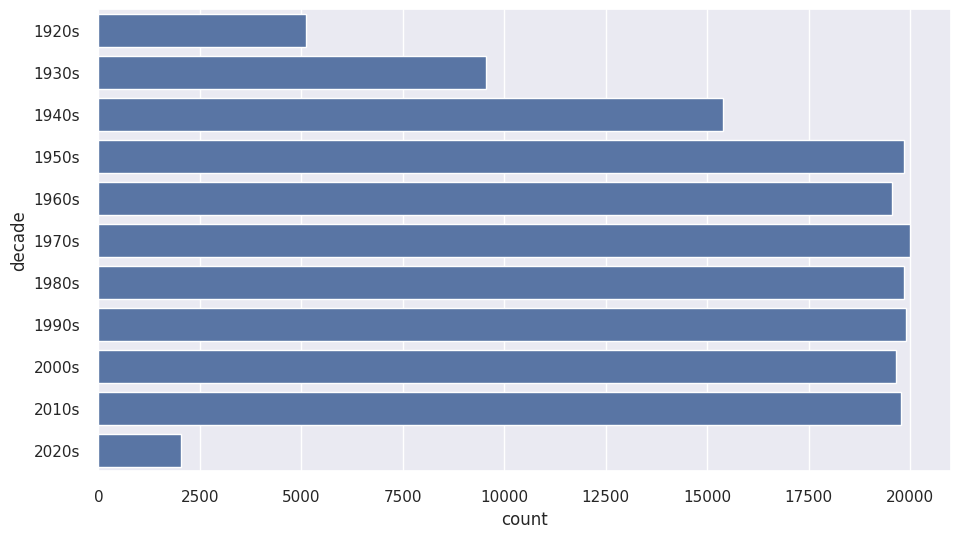

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [ ]:
# prompt: use DBSCAN to divide the genres in this dataset into ten clusters

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features_for_clustering = ['valence', 'energy', 'danceability', 'acousticness']
X_cluster = top10_genres[features_for_clustering]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
top10_genres['cluster'] = clusters

# Print the clusters
print(top10_genres)

# Visualization (optional)
import plotly.express as px
fig = px.scatter_3d(top10_genres, x='valence', y='energy', z='danceability', color='cluster')
fig.show()


                                                  genres          artists  \
20966                                    ['bedroom pop']      Ritt Momney   
14354                         ['latin pop', 'viral pop']        Lele Pons   
15070                                                 []  Los Legendarios   
11764  ['cubaton', 'latin', 'pop venezolano', 'reggae...         Jerry Di   
7463                                ['social media pop']           Emilee   
23687                                 ['tropical house']        Surf Mesa   
28263                               ['modern indie pop']      salem ilese   
213                                        ['scandipop']              A7S   
2343                                                  []          Beltito   
14378                                                 []     Lenny Santos   

       acousticness  danceability  duration_ms  energy  instrumentalness  \
20966      0.056300      0.399000     210463.0   0.491          0.000890   


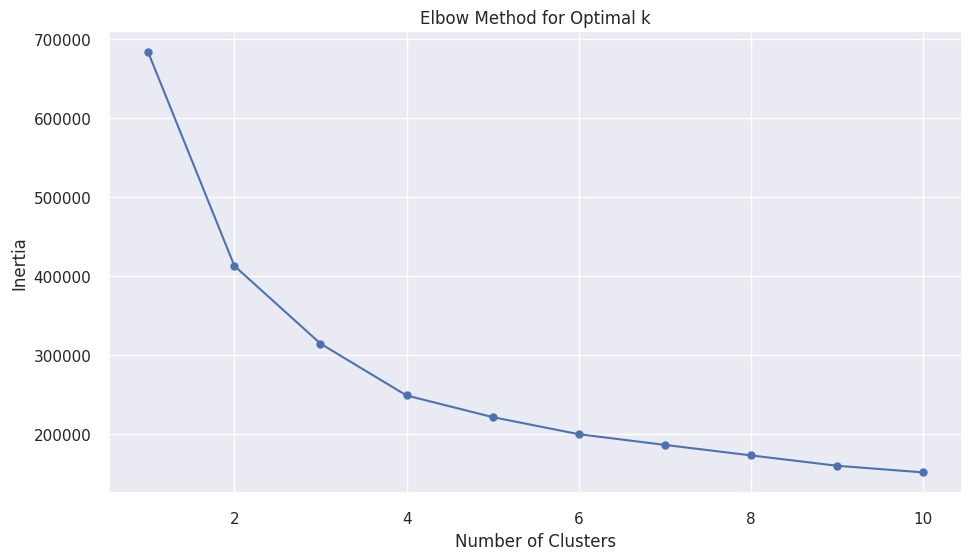

        valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                                   ...           ...   
170648

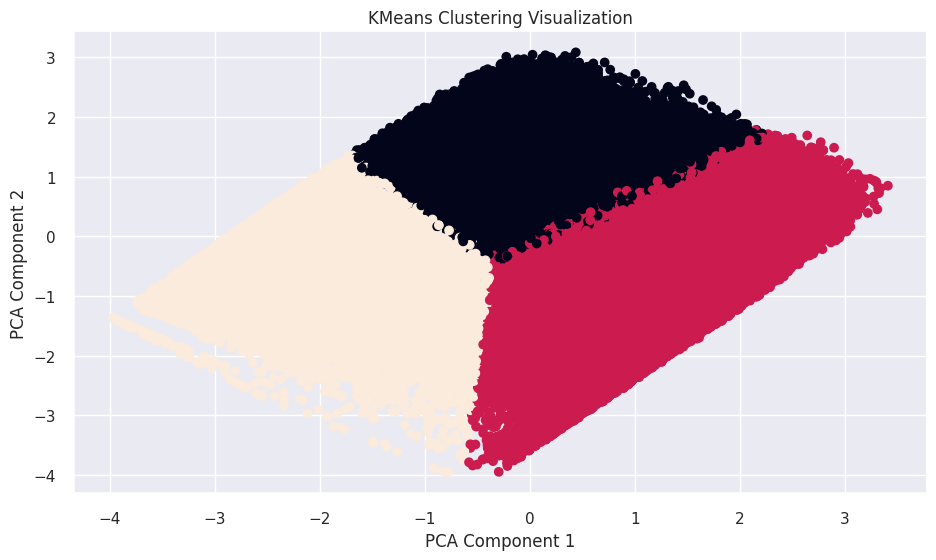

In [ ]:

import matplotlib.pyplot as plt
# Select features for clustering
features_for_clustering = ['valence', 'energy', 'danceability', 'acousticness']
X_cluster = data[features_for_clustering]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters based on the elbow method
# For example, if the elbow is at k=3, then you would use 3 clusters
n_clusters = 3  # Replace with your chosen number of clusters

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
data['cluster'] = clusters

# Print the clusters
print(data)

# Visualization (optional)
# You can visualize the clusters in a scatter plot or other suitable plot
# For example, to visualize in a 2D scatter plot using PCA:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



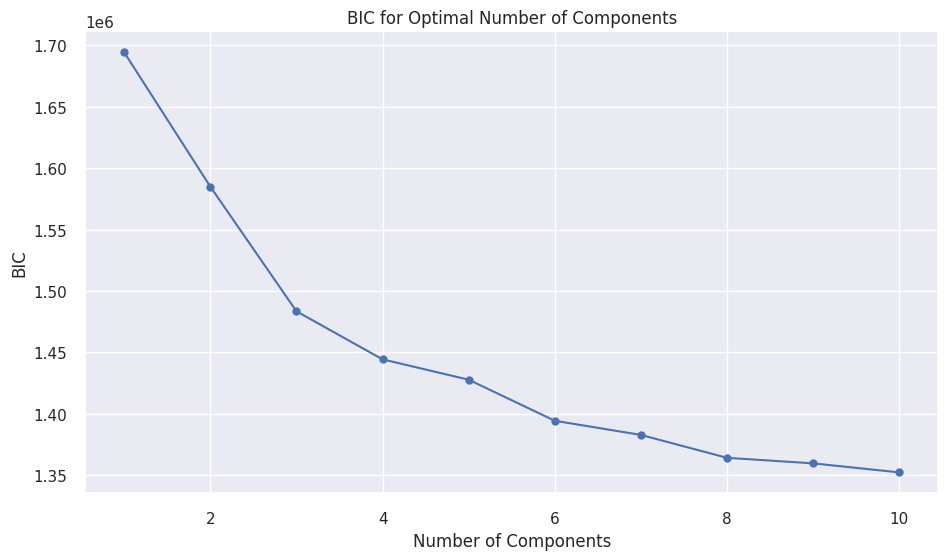

        valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                                   ...           ...   
170648

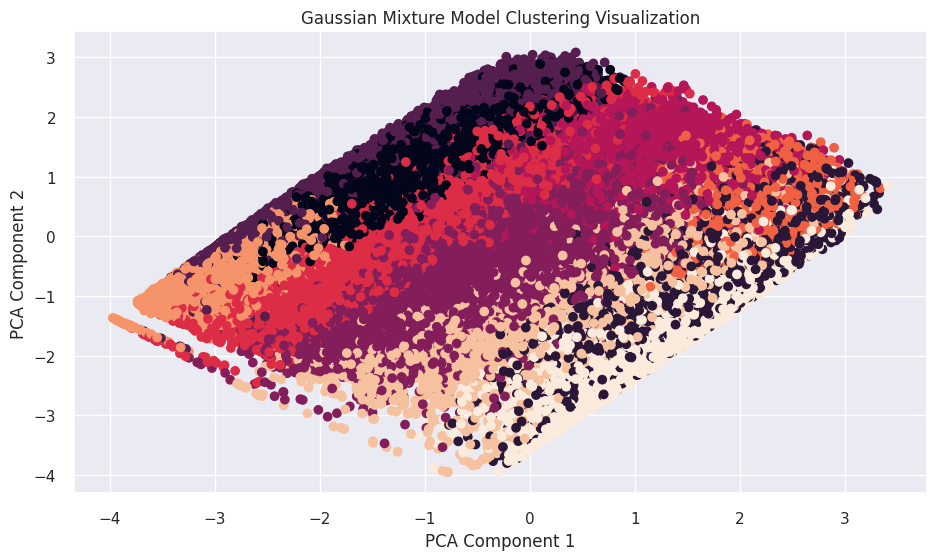

In [ ]:
# prompt: code for gaussian mixture models

import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Select features for clustering
features_for_clustering = ['valence', 'energy', 'danceability', 'acousticness']
X_cluster = data[features_for_clustering]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using the Bayesian Information Criterion (BIC)
n_components_range = range(1, 11)
lowest_bic = np.inf
bic = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

plt.plot(n_components_range, bic, marker='o')
plt.title('BIC for Optimal Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()


# Choose the optimal number of components based on the BIC
n_components = best_gmm.n_components

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=n_components, random_state=0)
clusters = gmm.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
data['cluster'] = clusters

# Print the clusters
print(data)

# Visualization (optional)
# You can visualize the clusters in a scatter plot or other suitable plot
# For example, to visualize in a 2D scatter plot using PCA:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.title('Gaussian Mixture Model Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
# prompt: compare the three models and print the one with the most accuracy

import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming you have your data and clustering results as follows:
# data: Your DataFrame with a 'cluster' column from each clustering algorithm
# X_scaled: Your scaled feature data

# Example data (replace with your actual data):
# data = ...  # Your DataFrame
# X_scaled = ... # Your scaled data

def evaluate_clustering(data, X_scaled, model_name):
    """
    Evaluates the clustering performance of a given model.
    """
    labels = data['cluster']
    # Ensure there are multiple clusters and the shapes are compatible
    if len(set(labels)) > 1 and X_scaled.shape[0] == len(labels):
        silhouette_avg = silhouette_score(X_scaled, labels)
    else:
        silhouette_avg = 0
    print(f"Silhouette Score for {model_name}: {silhouette_avg}")
    return silhouette_avg


# Evaluate KMeans
kmeans_score = evaluate_clustering(data, X_scaled, 'KMeans')

# Evaluate DBSCAN
# Use the scaled data and cluster labels corresponding to the top10_genres DataFrame
X_cluster_dbscan = top10_genres[features_for_clustering]
X_scaled_dbscan = scaler.fit_transform(X_cluster_dbscan)  # Scale data for DBSCAN
dbscan_score = evaluate_clustering(top10_genres, X_scaled_dbscan, 'DBSCAN')

# Evaluate Gaussian Mixture Model
gmm_score = evaluate_clustering(data, X_scaled, 'Gaussian Mixture Model')

# Find the model with the highest silhouette score
model_scores = {
    'KMeans': kmeans_score,
    'DBSCAN': dbscan_score,
    'Gaussian Mixture Model': gmm_score,
}
best_model = max(model_scores, key=model_scores.get)
print(f"\nThe model with the highest silhouette score is: {best_model}")

Silhouette Score for KMeans: 0.012448747390534963
Silhouette Score for DBSCAN: 0.3639742698862102
Silhouette Score for Gaussian Mixture Model: 0.012448747390534963

The model with the highest silhouette score is: DBSCAN


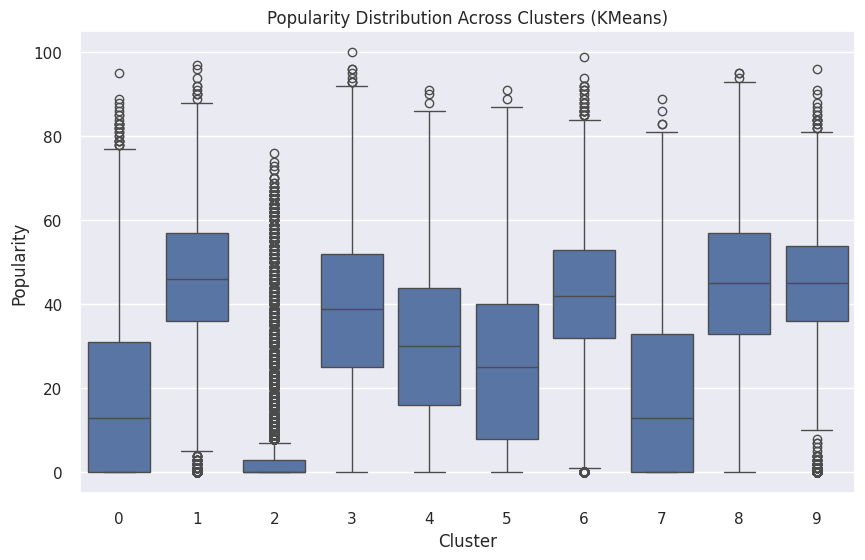

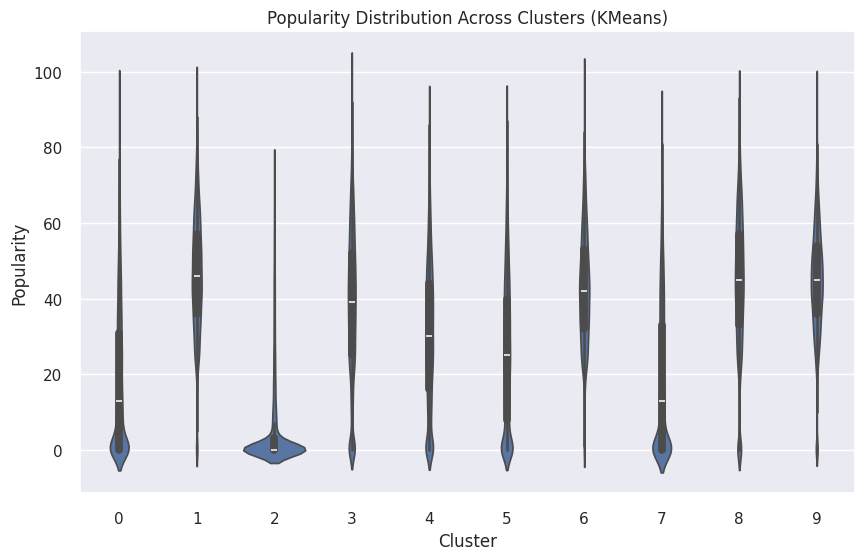

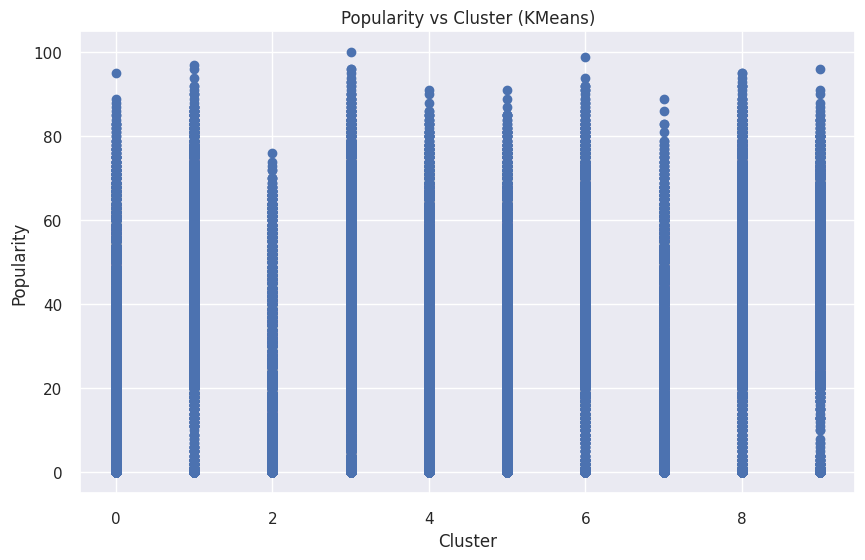

In [ ]:
# prompt: plot a graph to show the

import matplotlib.pyplot as plt
# Assuming you have the 'data' DataFrame with a 'cluster' column from KMeans clustering
# and you want to visualize the distribution of popularity within each cluster.

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='popularity', data=data)
plt.title('Popularity Distribution Across Clusters (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.show()

# You can also create a violin plot to show the distribution in more detail
plt.figure(figsize=(10, 6))
sns.violinplot(x='cluster', y='popularity', data=data)
plt.title('Popularity Distribution Across Clusters (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.show()

# You can also use a scatter plot to show the relationship between cluster and popularity
plt.figure(figsize=(10, 6))
plt.scatter(data['cluster'], data['popularity'])
plt.title('Popularity vs Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.show()
